# Module Importation

In [126]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Data Loading

In [127]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

# Show image

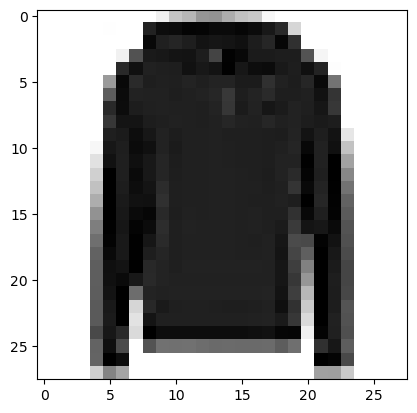

In [128]:
random_id=int(np.random.rand(1)[0]*len(x_train))
plt.imshow(x_train[random_id], cmap="Greys")
plt.show()

# Perceptron

In [129]:
x_train=x_train.reshape(x_train.shape[0],-1)/255.0
x_test=x_test.reshape(x_test.shape[0],-1)/255.0
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [130]:
model=Sequential([
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
history=model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=256)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6362 - loss: 1.0663 - val_accuracy: 0.7742 - val_loss: 0.6846
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7947 - loss: 0.6241 - val_accuracy: 0.8107 - val_loss: 0.5699
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8170 - loss: 0.5491 - val_accuracy: 0.8235 - val_loss: 0.5274
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.5110 - val_accuracy: 0.8282 - val_loss: 0.4958
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8339 - loss: 0.4874 - val_accuracy: 0.8332 - val_loss: 0.4791
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8400 - loss: 0.4699 - val_accuracy: 0.8388 - val_loss: 0.4720
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8434 - loss: 0.4574 - val_accuracy: 0.8428 - val_loss: 0.4573
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.4473 - val_accuracy: 0.

In [132]:
test_acc=model.evaluate(x_test, y_test)[1]
print(f"Accuracy on test set is {test_acc*100:.1f}%.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8356 - loss: 0.4695
Accuracy on test set is 83.6%.


# CNN

In [133]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import Input

In [134]:
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()
x_train=x_train[:,:,:,np.newaxis]/255.0
x_test=x_test[:,:,:,np.newaxis]/255.0
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [135]:
model_cnn=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same',
        activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [136]:
model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [137]:
model_cnn.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,770 (491.29 KB)

 Trainable params: 125,770 (491.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cnn.fit(x_train, y_train,
    epochs=10, validation_split=0.1, batch_size=256)

Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.9010 - loss: 0.2806 - val_accuracy: 0.8938 - val_loss: 0.2952
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.9044 - loss: 0.2723 - val_accuracy: 0.8942 - val_loss: 0.2948
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.9059 - loss: 0.2693 - val_accuracy: 0.8960 - val_loss: 0.2890
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.9070 - loss: 0.2643 - val_accuracy: 0.8977 - val_loss: 0.2854
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.9076 - loss: 0.2610 - val_accuracy: 0.8972 - val_loss: 0.2844
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.9098 - loss: 0.2573 - val_accuracy: 0.9002 - val_loss: 0.2813
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.9102 - loss: 0.2531 - val_accuracy: 0.8990 - val_loss: 0.2785
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.9115 - loss: 0

In [140]:
test_acc_cnn=model_cnn.evaluate(x_test, y_test)[1]
print(f"Accuracy on test set is:\nNN: {test_acc*100:.1f}%.\nCNN: {test_acc_cnn*100:.1f}%.")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8935 - loss: 0.2930
Accuracy on test set is:
NN: 83.6%.
CNN: 89.3%.


# Deeper CNN

In [144]:
model_cnn_deeper=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [145]:
model_cnn_deeper.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [146]:
model_cnn_deeper.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,234 (94.66 KB)

 Trainable params: 24,234 (94.66 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
model_cnn_deeper.fit(x_train,y_train,
    epochs=10, validation_split=0.1, batch_size=256)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.7511 - loss: 0.7437 - val_accuracy: 0.8373 - val_loss: 0.4542
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8498 - loss: 0.4239 - val_accuracy: 0.8625 - val_loss: 0.3940
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.8676 - loss: 0.3782 - val_accuracy: 0.8670 - val_loss: 0.3704
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.8762 - loss: 0.3534 - val_accuracy: 0.8770 - val_loss: 0.3422
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.8837 - loss: 0.3320 - val_accuracy: 0.8867 - val_loss: 0.3241
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.8893 - loss: 0.3169 - val_accuracy: 0.8877 - val_loss: 0.3253
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8914 - loss: 0.3067 - val_accuracy: 0.8848 - val_loss: 0.3208
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 87ms/step - accuracy: 0.8953 - loss: 0.2952 - 

In [148]:
dic_acc={
    "NN": test_acc,
    "CNN": test_acc_cnn,
}
dic_acc["CNN deeper"]=model_cnn_deeper.evaluate(x_test, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8846 - loss: 0.3216


In [150]:
def print_results_dic(dic_result):
    print("Accuracy on test set is:")
    for key, value in dic_result.items():
        print(f"{value*100:.1f}% : {key}")

In [151]:
print_results_dic(dic_acc)

Accuracy on test set is:
83.6% : NN
89.3% : CNN
88.5% : CNN deeper


# Add a Dense Layer

In [156]:
model_5=Sequential([
    Input(shape=(28,28,1)),
    Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
model_5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [157]:
model_5.fit(x_train,y_train,
    epochs=10, validation_split=0.1, batch_size=256)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.7019 - loss: 0.8450 - val_accuracy: 0.8123 - val_loss: 0.4987
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8453 - loss: 0.4414 - val_accuracy: 0.8517 - val_loss: 0.4054
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8654 - loss: 0.3863 - val_accuracy: 0.8670 - val_loss: 0.3702
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/step - accuracy: 0.8748 - loss: 0.3578 - val_accuracy: 0.8757 - val_loss: 0.3447
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.8834 - loss: 0.3341 - val_accuracy: 0.8728 - val_loss: 0.3498
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.8865 - loss: 0.3228 - val_accuracy: 0.8878 - val_loss: 0.3228
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.8921 - loss: 0.3063 - val_accuracy: 0.8907 - val_loss: 0.3074
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.8966 - loss: 0.2929 - 

In [ ]:
dic_acc["CNN 2conv2D + 2Dense"]=model_5.evaluate(x_test, y_test)[1]
print_results_dic(dic_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8864 - loss: 0.3143
Accuracy on test set is:
83.6% : NN
89.3% : CNN
88.5% : CNN deeper
88.6% : CNN 2conv2D = 2Dense


# Drop out